In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('E:/widebot task/ML_task/training.csv',sep=';',decimal=',')
test=pd.read_csv('E:/widebot task/ML_task/validation.csv',sep=';',decimal=',')

In [3]:
train.head(10)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,1600000.0,f,0,no.
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,2760000.0,NaN,0,no.
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,2800000.0,NaN,0,no.
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,2200000.0,NaN,0,no.
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,3200000.0,NaN,0,no.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null float64
variable3     3700 non-null float64
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null float64
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 549.3+ KB


In [5]:
# labels=train.classLabel
# train.drop(['classLabel'],axis=1,inplace=True)

In [6]:
train.rename(columns={'variable17':'variable16',
                          'variable18':'variable17',
                          'variable19':'variable18'}, 
                 inplace=True)
test.rename(columns={'variable17':'variable16',
                          'variable18':'variable17',
                          'variable19':'variable18'}, 
                 inplace=True)

In [7]:
train.head(10)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable17,variable18,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,1600000.0,f,0,no.
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,2760000.0,NaN,0,no.
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,2800000.0,NaN,0,no.
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,2200000.0,NaN,0,no.
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,3200000.0,NaN,0,no.


In [8]:
print("training set empty values per variable:")
for i in range (0,18):
    print("variable"+str(i+1),train["variable"+str(i+1)].isnull().sum())
    
print("test set empty values per variable:")
for i in range (0,18):
    print("variable"+str(i+1),test["variable"+str(i+1)].isnull().sum())

training set empty values per variable:
variable1 39
variable2 39
variable3 0
variable4 64
variable5 64
variable6 66
variable7 66
variable8 0
variable9 0
variable10 0
variable11 0
variable12 0
variable13 0
variable14 100
variable15 0
variable16 100
variable17 2145
variable18 0
test set empty values per variable:
variable1 3
variable2 3
variable3 0
variable4 2
variable5 2
variable6 3
variable7 3
variable8 0
variable9 0
variable10 0
variable11 0
variable12 0
variable13 0
variable14 3
variable15 0
variable16 3
variable17 111
variable18 0


In [9]:
train.nunique()

variable1       2
variable2     288
variable3     179
variable4       3
variable5       3
variable6      14
variable7       9
variable8     118
variable9       2
variable10      2
variable11     23
variable12      2
variable13      3
variable14    136
variable15    182
variable16    136
variable17      2
variable18      2
classLabel      2
dtype: int64

In [10]:
test.nunique()

variable1       2
variable2     160
variable3     113
variable4       2
variable5       2
variable6      13
variable7       8
variable8      74
variable9       2
variable10      2
variable11     16
variable12      2
variable13      3
variable14     79
variable15     88
variable16     79
variable17      2
variable18      2
classLabel      2
dtype: int64

* Let's drop variable17 as it contains a high ratio of null values

In [11]:
train.drop(['variable17'], inplace=True, axis=1)
test.drop(['variable17'], inplace=True, axis=1)

In [12]:
train.classLabel=train.classLabel.map({"no.":0,"yes.":1})
test.classLabel=test.classLabel.map({"no.":0,"yes.":1})
train.head(10)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable18,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,0,0
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,0,0
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,0,0
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,0,0
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,0,0
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,1600000.0,0,0
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,2760000.0,0,0
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,2800000.0,0,0
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,2200000.0,0,0
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,3200000.0,0,0


# Choosing the right metrics:

In [13]:
label1=train.classLabel[train['classLabel']==1].count()
label0=train.classLabel[train['classLabel']==0].count()
n_records = train.classLabel.count()
print("number of examples in training set={}".format(n_records))
print("percentage of examples belonging to class 1 ={}".format(label1/n_records))
print("percentage of examples belonging to class 0 ={}".format(label0/n_records))

label1_test=test.classLabel[train['classLabel']==1].count()
label0_test=test.classLabel[train['classLabel']==0].count()
n_records_test = test.classLabel.count()
print("number of examples in test set={}".format(n_records_test))
print("percentage of examples belonging to class 1 ={}".format(label1_test/n_records_test))
print("percentage of examples belonging to class 0 ={}".format(label0_test/n_records_test))

number of examples in training set=3700
percentage of examples belonging to class 1 =0.9254054054054054
percentage of examples belonging to class 0 =0.0745945945945946
number of examples in test set=200
percentage of examples belonging to class 1 =0.415
percentage of examples belonging to class 0 =0.585


* ### The classes are not equally distributed, so it is not wise to use accuracy as a metric but instead we should use precision and recall or F1 score. We may put more weight on precision because we want to minimize the false positives. i.e: classifying negative examples (the minor class) as negative. Let's use an Fbeta score with beta set to 0.5 to give precision a higher weight.

# Imputing missing values:

### 1) For Categorical variables:
* Let's fill nan values with the mode as a start.

In [14]:
variables=["variable1","variable4","variable5","variable6","variable7"]
modes=[]
for variable in variables:
    mode=train[variable].mode()[0]
    modes.append(mode)
print(modes)





['b', 'u', 'g', 'c', 'v']


In [15]:
for i in range (0,len(variables)) :
    train=train.fillna({variables[i]:modes[i]})
train.head(10)

for i in range (0,len(variables)) :
    test=test.fillna({variables[i]:modes[i]})
train.head(10)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable18,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,0,0
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,0,0
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,0,0
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,0,0
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,0,0
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,1600000.0,0,0
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,2760000.0,0,0
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,2800000.0,0,0
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,2200000.0,0,0
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,3200000.0,0,0


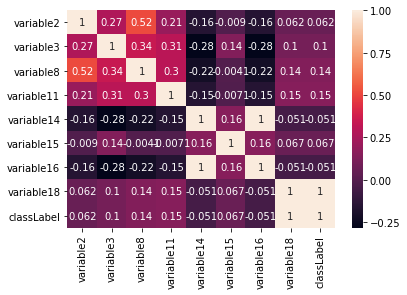

In [16]:
sns.heatmap(train[["variable2","variable3","variable8","variable11","variable14","variable15","variable16","variable18","classLabel"]].corr(),annot=True)

* Notice that variable 18 has correlation coefficient of 1 with the label! But we cannot drop other features and depend on it because validation data may not have the same correlation.
* variable14 is just variable18 but multiplied by a constant. So, we will drop one of them.

### For continious features:
* Let's fill nan falues with the mean as a start.

In [17]:
cont_variables=["variable2","variable14","variable16"]
means=[]
for variable in cont_variables:
    mean=train[variable].mean()
    means.append(mean)
    
print(means)

[32.82071291996722, 162.695, 1626950.0]


In [18]:
for i in range (0,len(cont_variables)) :
    train=train.fillna({cont_variables[i]:means[i]})
train.head(10)

for i in range (0,len(cont_variables)) :
    test=test.fillna({cont_variables[i]:means[i]})

In [19]:
y_train=train.classLabel
train.drop(['classLabel'],inplace=True,axis=1)
y_test=test.classLabel
test.drop(['classLabel'],inplace=True,axis=1)


### Drop variable18 as it is missleading. In training set it is highly correlated with the label but in the test set it is not!

In [20]:
from sklearn.preprocessing import MinMaxScaler

total_data=pd.concat((train, test)).reset_index(drop=True)

scaler = MinMaxScaler() 
numerical = ['variable2', 'variable3', 'variable8', 'variable14','variable15','variable16']
total_data[numerical]=scaler.fit_transform(total_data[numerical])
total_data.head(10)


C:\Users\awadd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable18
0,a,0.062707,0.019286,u,g,c,v,0.061404,f,t,1,t,g,0.040,0.00005,0.040,0
1,b,0.047669,0.011964,y,p,k,v,0.010175,f,f,0,f,s,0.100,0.00000,0.100,0
2,b,0.263158,0.040179,u,g,ff,ff,0.000000,f,t,1,f,g,0.048,0.00019,0.048,0
3,a,0.517594,0.047679,u,g,i,o,0.011754,f,f,0,f,g,0.000,0.00120,0.000,0
4,b,0.279398,0.125000,u,g,k,v,0.017544,f,f,0,t,g,0.116,0.00000,0.116,0
5,a,0.316992,0.044643,y,p,i,h,0.017544,f,f,0,t,g,0.080,0.00000,0.080,0
6,a,0.186767,0.071429,u,g,j,j,0.000000,f,f,0,t,g,0.138,0.00001,0.138,0
7,b,0.111579,0.031250,y,p,c,h,0.008772,f,f,0,f,g,0.140,0.00204,0.140,0
8,b,0.228120,0.013393,u,g,c,v,0.010175,f,f,0,f,g,0.110,0.00140,0.110,0
9,b,0.066466,0.366071,u,g,c,h,0.038070,f,f,0,f,g,0.160,0.00013,0.160,0


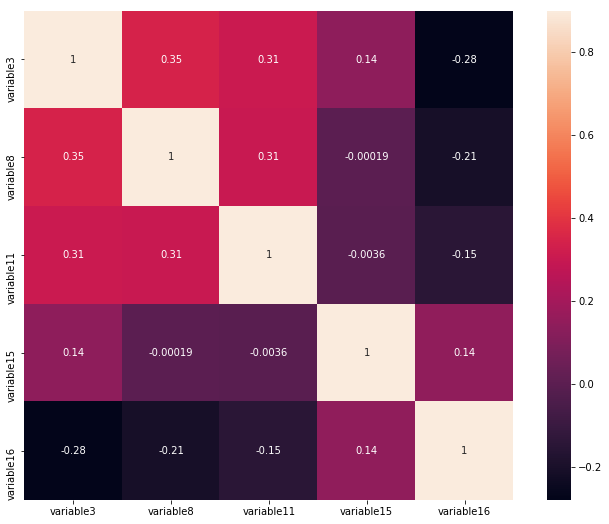

In [21]:
total_data.drop(["variable18","variable2","variable14"],axis=1,inplace=True)
corrmat = total_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,annot=True)
total_data=pd.get_dummies(total_data)
X_train=total_data.iloc[0:3700]
X_test=total_data.iloc[3700:]


# Training Pipeline:

In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [23]:
from sklearn.metrics import fbeta_score,precision_score,recall_score

def train_predict(clf,X_train, y_train, X_test, y_test): 
    
    results = {}
   
    start = time() 
    clf.fit(X_train,y_train)
    end = time() 
    
    results['train_time'] = end-start
        
    start = time() 
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train)
    end = time() 
    
    results['pred_time'] = end-start
    results['precision_train']=precision_score(y_train,predictions_train)
    results['precision_test']=precision_score(y_test,predictions_test)
    results['recall_train']=recall_score(y_train,predictions_train)
    results['recall_test']=recall_score(y_test,predictions_test)
    results['f0.5_train'] = fbeta_score(y_train,predictions_train,beta=0.5)  
    results['f0.5_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    print("{} trained on {} samples.".format(clf.__class__.__name__, y_train.count()))
        
    return results

In [24]:
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = AdaBoostClassifier(random_state=0)
clf_C=SVC(C=50,kernel='rbf',gamma=2)
clf_D=KNeighborsClassifier()
results = {}
for clf in [clf_A, clf_B,clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf,X_train, y_train, X_test, y_test)
    
    



DecisionTreeClassifier trained on 3700 samples.
AdaBoostClassifier trained on 3700 samples.
SVC trained on 3700 samples.
KNeighborsClassifier trained on 3700 samples.


In [25]:
report=pd.DataFrame(results)
report.head(10)

,DecisionTreeClassifier,AdaBoostClassifier,SVC,KNeighborsClassifier
f0.5_test,0.796646,0.680787,0.782123,0.725126
f0.5_train,1.000000,0.978085,0.998600,0.983456
precision_test,0.791667,0.633803,0.756757,0.688000
precision_train,1.000000,0.974993,0.998251,0.979405
pred_time,0.003990,0.039895,0.122109,0.265606
recall_test,0.817204,0.967742,0.903226,0.924731
recall_train,1.000000,0.990654,1.000000,1.000000
train_time,0.021940,0.203420,0.162562,0.015576


#### From the results, i choose the DecisionTree Model to proceed with and tune its hyperparameters using GridSearch.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = DecisionTreeClassifier(random_state=0)

parameters = {'max_depth':[8,10,12,13,14,16,18],'min_samples_leaf':[2,4,6,8,12,14,16]}
scorer = make_scorer(fbeta_score, beta=0.5)
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=10)
grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
print(best_clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [27]:
best_clf_train_score=fbeta_score(y_train,best_clf.predict(X_train),beta=0.5)
best_clf_test_score=fbeta_score(y_test,best_clf.predict(X_test),beta=0.5)
print("Best model's f0.5_score on training set={}".format(best_clf_train_score))
print("Best model's f0.5_score on test set={}".format(best_clf_test_score))

Best model's f0.5_score on training set=0.9981343283582089
Best model's f0.5_score on test set=0.8027079303675049


## My final model is a DecisionTree with an F0.5_score of 80% on unseen test (validation) data.
* It appears that due to the small size of the training set and due to non-qual class distributions, learning models overfit even after Hyperparameter tuning.